In [41]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [42]:
df = pd.read_csv('feature_data.csv')
price_df = pd.read_csv('1 - Propery_Basic.csv')
feat_price_df = pd.merge(price_df,df, on = 'ID')

In [43]:
feat_price_df.head()

,ID,address,price,bedroom,bathroom,parking_x,proType,sold_date,agency_name,agency_addr,...,captivating property,restaurant,second large living area,deck,air-condition,generous storage,spa bath,split systems,walk to mitcham train station & shops,potential for two small parking spots
0,7513227,544 Velore Road Denison Vic 3858,465000,3,2,4,Farmlet,Wed 08-May-13,LJ Hooker - Sale,236 - 288 Raymond Street Sale Vic 3850,...,0,0,0,0,0,0,0,0,0,0
1,7720571,1375 Ballan Road Quandong Vic 3030,1220000,2,1,0,Lifestyle,Fri 12-Jun-15,McNaughton Estate Agents - Werribee,38 Synnot Street Werribee Vic 3030,...,0,0,0,0,0,0,0,0,0,0
2,104997043,1/76 Scotsburn Avenue Clayton Vic 3168,560000,3,1,2,Unit,Sat 07-Dec-13,Ray White - Oakleigh,7-9 Atherton Road Oakleigh Vic 3166,...,0,0,0,0,0,0,0,0,0,0
3,105023594,47 Lee Street Deer Park Vic 3023,385000,4,1,2,House,Mon 01-Sep-14,Sweeney Estate Agents - Caroline Springs,"Shop 21A, 13-15 Lake Street Caroline Springs V...",...,0,0,0,0,0,0,0,0,0,0
4,105140240,15 Fiddian Court Altona Meadows Vic 3028,500000,4,2,2,House,Thu 23-Apr-15,Hunter French Real Estate - Altona Meadows & A...,"Shop 22, 1 Central Avenue Altona Meadows Vic 3...",...,0,0,0,0,0,0,0,0,0,0


In [44]:
feat_price_df = feat_price_df.drop(['address','bedroom','bathroom','parking_x', 'proType','sold_date','agency_name','agency_addr','des_head','des_content','features' ], axis = 1)

In [45]:
feat_price_df.head()

,ID,price,Unnamed: 1,split system,gazebo,outdoor kitchen sink,land house style: contemporary,walk to bus & haileybury,central development opportunity (stca),buil,...,captivating property,restaurant,second large living area,deck,air-condition,generous storage,spa bath,split systems,walk to mitcham train station & shops,potential for two small parking spots
0,7513227,465000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7720571,1220000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,104997043,560000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,105023594,385000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,105140240,500000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
print(feat_price_df['price'].max())
print(feat_price_df['price'].min())

123456792
11562


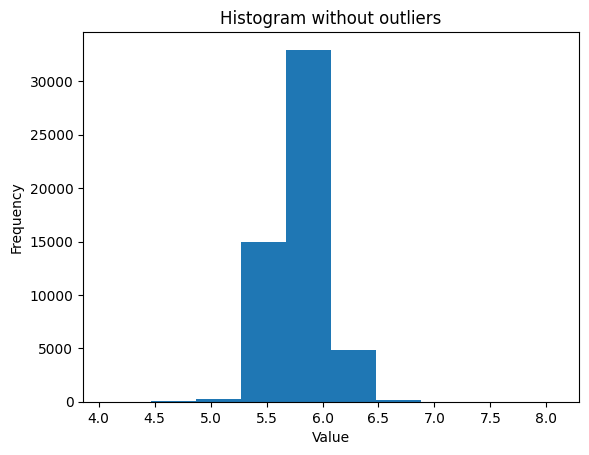

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with potential outliers
data = feat_price_df['price']
# Remove outliers using the IQR method
import numpy as np
data = np.log10(feat_price_df['price'])

# Plot the histogram of the cleaned data
plt.hist(data, bins=10)
plt.title("Histogram without outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


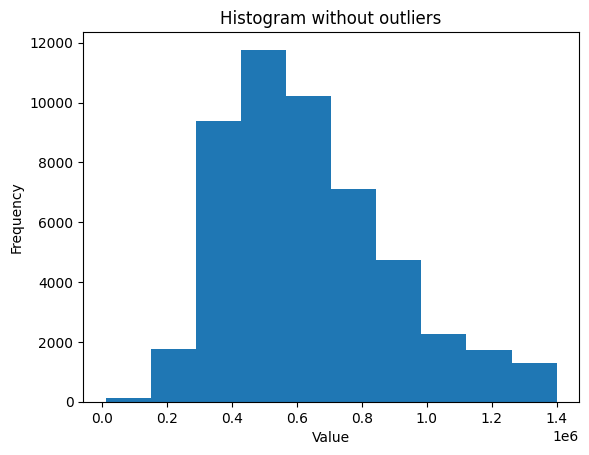

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with potential outliers
data = feat_price_df['price']
# Remove outliers using the IQR method
q25, q75 = np.percentile(data, [25, 75])
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
cleaned_data =  [x for x in data if ((lower_bound <= x) and  (x <= upper_bound))]
plt.hist(cleaned_data, bins=10)
plt.title("Histogram without outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [49]:
cleaned_df = feat_price_df[(lower_bound <= feat_price_df.price) & (feat_price_df.price <= upper_bound)]

In [50]:
print(cleaned_df.shape[0],feat_price_df.shape[0])

50381 53220


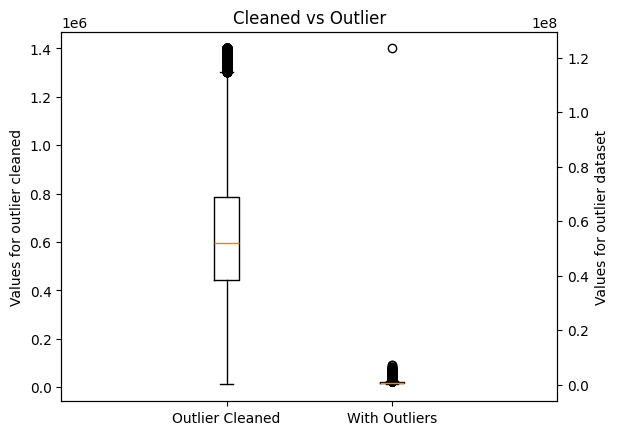

In [51]:
fig, ax1 = plt.subplots()

# Create the first box plot on the first axes
ax1.boxplot(cleaned_df['price'], positions=[1], labels=['Outlier Cleaned'])
ax1.set_ylabel('Values for outlier cleaned')

# Create the second axes, sharing the x-axis with the first
ax2 = ax1.twinx()

# Create the second box plot on the second axes
ax2.boxplot(feat_price_df['price'], positions=[2], labels=['With Outliers'])
ax2.set_ylabel('Values for outlier dataset')

# Adjust x-axis limits to accommodate both box plots
ax1.set_xlim(0, 3)

# Display the plot
plt.title('Cleaned vs Outlier')
plt.show()

In [52]:
import pandas as pd
import numpy as np

# Example DataFrame


# Bin into deciles (10% bins)
cleaned_df = feat_price_df[(lower_bound <= feat_price_df.price) & (feat_price_df.price <= upper_bound)]
cleaned_df['price'] = pd.cut(cleaned_df['price'], bins=5, labels = [ str(x*(cleaned_df['price'].max() - cleaned_df['price'].min())/5) + "-" + str((x+1)*(cleaned_df['price'].max() - cleaned_df['price'].min())/5) for x in range(1,6) ] )


C:\Users\OGgol\AppData\Local\Temp\ipykernel_18168\1777518449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price'] = pd.cut(cleaned_df['price'], bins=5, labels = [ str(x*(cleaned_df['price'].max() - cleaned_df['price'].min())/5) + "-" + str((x+1)*(cleaned_df['price'].max() - cleaned_df['price'].min())/5) for x in range(1,6) ] )


In [53]:
cleaned_df.head()

,ID,price,Unnamed: 1,split system,gazebo,outdoor kitchen sink,land house style: contemporary,walk to bus & haileybury,central development opportunity (stca),buil,...,captivating property,restaurant,second large living area,deck,air-condition,generous storage,spa bath,split systems,walk to mitcham train station & shops,potential for two small parking spots
0,7513227,555375.2-833062.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7720571,1388438.0-1666125.6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,104997043,555375.2-833062.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,105023594,555375.2-833062.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,105140240,555375.2-833062.8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
cleaned_df['price'].dtype

CategoricalDtype(categories=['277687.6-555375.2', '555375.2-833062.8',
                  '833062.8-1110750.4', '1110750.4-1388438.0',
                  '1388438.0-1666125.6'],
, ordered=True, categories_dtype=object)

In [55]:
value_counts = cleaned_df['price'].value_counts()
value_counts

price
555375.2-833062.8      21140
833062.8-1110750.4     17317
1110750.4-1388438.0     7012
1388438.0-1666125.6     3008
277687.6-555375.2       1904
Name: count, dtype: int64

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Split into training and test sets
Y = cleaned_df['price']
X = cleaned_df.drop(['price','ID'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



# Train Multinomial Naive Bayes model
model = BernoulliNB(fit_prior=True)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4216341382732385
Classification Report:
                      precision    recall  f1-score   support

1110750.4-1388438.0       0.00      0.00      0.00      2049
1388438.0-1666125.6       0.00      0.00      0.00       911
  277687.6-555375.2       0.07      0.00      0.01       542
  555375.2-833062.8       0.42      1.00      0.59      6386
 833062.8-1110750.4       0.53      0.00      0.00      5227

           accuracy                           0.42     15115
          macro avg       0.20      0.20      0.12     15115
       weighted avg       0.37      0.42      0.25     15115



In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4226926893814092
Classification Report:
                      precision    recall  f1-score   support

1110750.4-1388438.0       0.00      0.00      0.00      2049
1388438.0-1666125.6       0.00      0.00      0.00       911
  277687.6-555375.2       1.00      0.00      0.00       542
  555375.2-833062.8       0.42      1.00      0.59      6386
 833062.8-1110750.4       0.45      0.00      0.00      5227

           accuracy                           0.42     15115
          macro avg       0.38      0.20      0.12     15115
       weighted avg       0.37      0.42      0.25     15115



c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Feature 0: 8.814579
Feature 1: nan
Feature 2: 1.916956
Feature 3: 1.390267
Feature 4: nan
Feature 5: nan
Feature 6: nan
Feature 7: nan
Feature 8: nan
Feature 9: nan
Feature 10: 1.390267
Feature 11: nan
Feature 12: nan
Feature 13: nan
Feature 14: nan
Feature 15: nan
Feature 16: nan
Feature 17: nan
Feature 18: 1.916956
Feature 19: nan
Feature 20: nan
Feature 21: nan
Feature 22: nan
Feature 23: nan
Feature 24: nan
Feature 25: nan
Feature 26: nan
Feature 27: nan
Feature 28: nan
Feature 29: nan
Feature 30: nan
Feature 31: nan
Feature 32: nan
Feature 33: nan
Feature 34: nan
Feature 35: nan
Feature 36: nan
Feature 37: nan
Feature 38: nan
Feature 39: nan
Feature 40: nan
Feature 41: nan
Feature 42: nan
Feature 43: nan
Feature 44: nan
Feature 45: nan
Feature 46: nan
Feature 47: nan
Feature 48: nan
Feature 49: nan
Feature 50: nan
Feature 51: nan
Feature 52: nan
Feature 53: nan
Feature 54: nan
Feature 55: nan
Feature 56: 14.525838
Feature 57: nan
Feature 58: nan
Feature 59: nan
Feature 60: nan
Fea

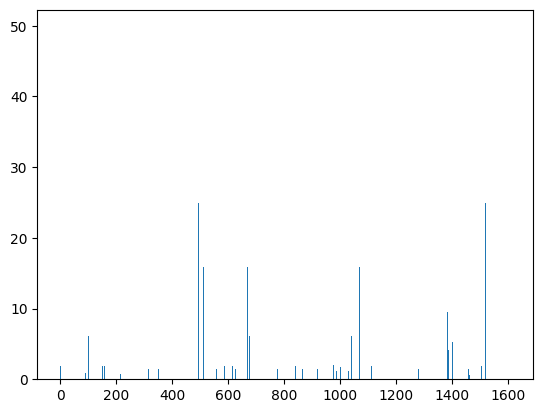

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs



#Select features top k features
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [59]:
# Train Multinomial Naive Bayes model
model = BernoulliNB(fit_prior=True)
model.fit(X_train_fs, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_fs)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4216341382732385
Classification Report:
                      precision    recall  f1-score   support

1110750.4-1388438.0       0.00      0.00      0.00      2049
1388438.0-1666125.6       0.00      0.00      0.00       911
  277687.6-555375.2       0.07      0.00      0.01       542
  555375.2-833062.8       0.42      1.00      0.59      6386
 833062.8-1110750.4       0.53      0.00      0.00      5227

           accuracy                           0.42     15115
          macro avg       0.20      0.20      0.12     15115
       weighted avg       0.37      0.42      0.25     15115



In [60]:
model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr')
model.fit(X_train_fs,y_train)

y_pred = model.predict(X_test_fs)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4226926893814092
Classification Report:
                      precision    recall  f1-score   support

1110750.4-1388438.0       0.00      0.00      0.00      2049
1388438.0-1666125.6       0.00      0.00      0.00       911
  277687.6-555375.2       1.00      0.00      0.00       542
  555375.2-833062.8       0.42      1.00      0.59      6386
 833062.8-1110750.4       0.45      0.00      0.00      5227

           accuracy                           0.42     15115
          macro avg       0.38      0.20      0.12     15115
       weighted avg       0.37      0.42      0.25     15115



c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model = model = GradientBoostingClassifier()
model.fit(X_train_fs,y_train)

y_pred = model.predict(X_test_fs)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.42256037049288786
Classification Report:
                      precision    recall  f1-score   support

1110750.4-1388438.0       0.00      0.00      0.00      2049
1388438.0-1666125.6       0.00      0.00      0.00       911
  277687.6-555375.2       0.50      0.00      0.00       542
  555375.2-833062.8       0.42      1.00      0.59      6386
 833062.8-1110750.4       0.47      0.00      0.00      5227

           accuracy                           0.42     15115
          macro avg       0.28      0.20      0.12     15115
       weighted avg       0.36      0.42      0.25     15115



c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [62]:
import prince
mca = prince.MCA(
    n_components=50,
    n_iter=20,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(cleaned_df.drop(['ID','price'], axis = 1)) # same as calling ca.fs_r(1)
mca = mca.transform(cleaned_df.drop(['ID','price'], axis = 1))

In [63]:
mca.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.002782,-0.000692,-0.00028,-0.000242,-0.000811,-0.000335,-2.687727e-13,-3.234335e-13,5.141919e-13,-4.839239e-13,...,0.00006,-0.000054,-0.000061,-0.000041,-0.000292,0.000061,0.000034,-0.000373,0.000043,0.000072
1,-0.002782,-0.000692,-0.00028,-0.000242,-0.000811,-0.000335,-2.687727e-13,-3.234335e-13,5.141919e-13,-4.839239e-13,...,0.00006,-0.000054,-0.000061,-0.000041,-0.000292,0.000061,0.000034,-0.000373,0.000043,0.000072
2,-0.002782,-0.000692,-0.00028,-0.000242,-0.000811,-0.000335,-2.687727e-13,-3.234335e-13,5.141919e-13,-4.839239e-13,...,0.00006,-0.000054,-0.000061,-0.000041,-0.000292,0.000061,0.000034,-0.000373,0.000043,0.000072
3,-0.002782,-0.000692,-0.00028,-0.000242,-0.000811,-0.000335,-2.687727e-13,-3.234335e-13,5.141919e-13,-4.839239e-13,...,0.00006,-0.000054,-0.000061,-0.000041,-0.000292,0.000061,0.000034,-0.000373,0.000043,0.000072
4,-0.002782,-0.000692,-0.00028,-0.000242,-0.000811,-0.000335,-2.687727e-13,-3.234335e-13,5.141919e-13,-4.839239e-13,...,0.00006,-0.000054,-0.000061,-0.000041,-0.000292,0.000061,0.000034,-0.000373,0.000043,0.000072


In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial')

Y = cleaned_df['price']
X = mca
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4227588488256699
Classification Report:
                      precision    recall  f1-score   support

1110750.4-1388438.0       0.00      0.00      0.00      2049
1388438.0-1666125.6       0.00      0.00      0.00       911
  277687.6-555375.2       0.33      0.00      0.00       542
  555375.2-833062.8       0.42      1.00      0.59      6386
 833062.8-1110750.4       0.64      0.00      0.00      5227

           accuracy                           0.42     15115
          macro avg       0.28      0.20      0.12     15115
       weighted avg       0.41      0.42      0.25     15115



c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OGgol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [65]:
import prince
mca = prince.MCA(
    n_components=2,
    n_iter=20,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(cleaned_df.drop(['ID','price'], axis = 1)) # same as calling ca.fs_r(1)
mca = mca.transform(cleaned_df.drop(['ID','price'], axis = 1))

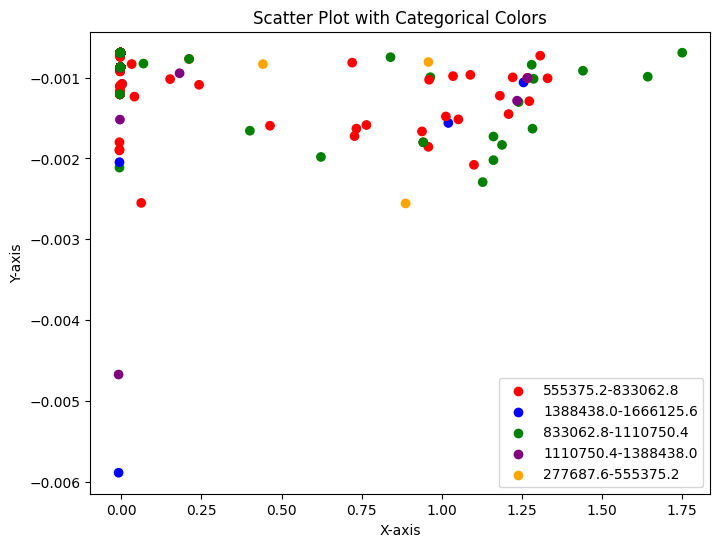

In [69]:


# Create scatter plot
percentile_75 = mca.iloc[:,1].quantile(0.75)
elements_within_75 = mca[mca.iloc[:,1] <= percentile_75]
colors_within_75 = cleaned_df[mca.iloc[:,1] <= percentile_75]

color_map = {cleaned_df['price'].unique()[0]: 'red', 
                      cleaned_df['price'].unique()[1]: 'blue', 
                      cleaned_df['price'].unique()[2]: 'green', 
                      cleaned_df['price'].unique()[3]: 'purple', 
                      cleaned_df['price'].unique()[4]: 'orange'}
colors = colors_within_75['price'].map(color_map)

plt.figure(figsize=(8, 6))
plt.scatter(elements_within_75.iloc[:,0],elements_within_75.iloc[:,1], c = colors)


# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Categorical Colors')

# Create legend
for category, color in color_map.items():
    plt.scatter([], [], c=color, label=category)
plt.legend()

In [ ]:
elements_within_75.head()

,0,1
0,-0.002782,-0.000692
1,-0.002782,-0.000692
2,-0.002782,-0.000692
3,-0.002782,-0.000692
4,-0.002782,-0.000692
